# Import Core Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [3]:
%run load_dataset.ipynb

In [4]:
all_subjects = ['1001','1002','1003','1004','1005','1006','1007','1008','1009','1010','1011','1012','1013','1014',]

In [5]:
X_all, y_all, subj_all, ts_all, hr_all = load_all_data(all_subjects)

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 1013's data
Loading 1014's data
Finished loading


# Data Preprocessing

In [6]:
%run preprocessing.ipynb

In [7]:
print(X_all.shape, y_all.shape)

(28898, 3) (28898,)


In [8]:
X_all

array([[0.2322401 , 0.68496146, 0.47128758],
       [0.23198487, 0.68602821, 0.46923669],
       [0.2322401 , 0.68624156, 0.47090303],
       ...,
       [0.52133037, 0.4263186 , 0.31059357],
       [0.64058579, 0.47292789, 0.26550587],
       [0.61571594, 0.47622184, 0.30601807]])

# Group Data by Label and Normalize Data

In [9]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [10]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

## Show Plot for each Activity and Subject

In [11]:
# group X_all and y_all from load_dataset.ipynb by labels
#X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
#X_norm = normalize_data(X_label)

In [12]:
#plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Reshape Data (Pure Label)

In [14]:
# get label-separated X and y
X_svm, y_svm = prepare_pure_label(X_all, y_all, subj_all, all_subjects, new_label_list)
y_svm = y_svm.reshape((y_svm.shape[0],))

X_pure, y_pure = prepare_pure_label(X_all, y_all, subj_all, all_subjects, new_label_list)
y_pure = y_pure.reshape((y_svm.shape[0],))

In [21]:
[np.array(x) for x in X_pure[:10]]

[array([0.35, 0.35, 0.35, 0.35, 0.35, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34,
        0.35, 0.35, 0.35, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.35, 0.34,
        0.34, 0.34, 0.35, 0.35, 0.34, 0.34, 0.35, 0.34, 0.34, 0.34, 0.34,
        0.34, 0.34, 0.34, 0.35, 0.34, 0.34, 0.34, 0.34, 0.34, 0.35, 0.34,
        0.35, 0.34, 0.35, 0.34, 0.35, 0.34, 0.34, 0.34, 0.35, 0.34, 0.34,
        0.34, 0.34, 0.34, 0.34, 0.34, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53,
        0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53,
        0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53,
        0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53,
        0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.54, 0.53, 0.53, 0.53,
        0.53, 0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.43,
        0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.42, 0.42, 0.43, 0.43, 0.43,
        0.42, 0.42, 0.42, 0.42, 0.43, 0.42, 0.42, 0.43, 0.42, 0.43, 0.42,
        0.43, 0.42, 0.42, 0.42, 0.43, 

In [23]:
y_pure[:3]

array([0, 0, 0])

# Reshape Data (Impure Label)

In [25]:
X_impure, y_impure = prepare_impure_label(X_all, y_all)

In [26]:
print(X_impure.shape, y_impure.shape)

(28838, 180) (28838,)


# Split Train and Test Set

In [27]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(23070, 180)
(5768, 180)


In [28]:
print(X_train.shape)
print(X_test.shape)

(22926, 180)
(5732, 180)


# K-nearest neighbors

In [29]:
knn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [30]:
filename = '../../model/knn_model.pkl'
pickle.dump(knn_model, open(filename, 'wb'))

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
knn_model_2 = nn_classifier(X_tr, y_tr)
print("Finished training")

In [ ]:
y_pred_2 = knn_model_2.predict(X_te)

## KNN Evaluation

In [ ]:
%run eval_score.ipynb

In [ ]:
LABELS = ['sit','sleep','stand','walk']

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

# Test with different k values

k = 1
Finished training


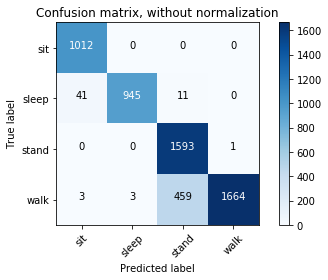

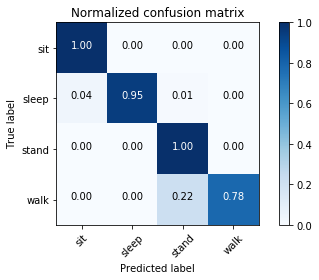

              precision    recall  f1-score   support

         sit       0.96      1.00      0.98      1012
       sleep       1.00      0.95      0.97       997
       stand       0.77      1.00      0.87      1594
        walk       1.00      0.78      0.88      2129

   micro avg       0.91      0.91      0.91      5732
   macro avg       0.93      0.93      0.92      5732
weighted avg       0.93      0.91      0.91      5732

k = 2
Finished training


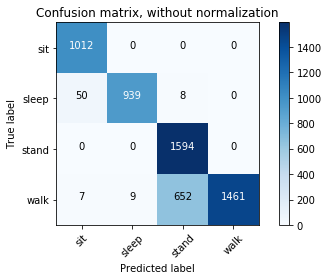

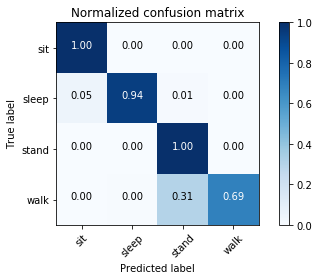

              precision    recall  f1-score   support

         sit       0.95      1.00      0.97      1012
       sleep       0.99      0.94      0.97       997
       stand       0.71      1.00      0.83      1594
        walk       1.00      0.69      0.81      2129

   micro avg       0.87      0.87      0.87      5732
   macro avg       0.91      0.91      0.90      5732
weighted avg       0.91      0.87      0.87      5732

k = 3
Finished training


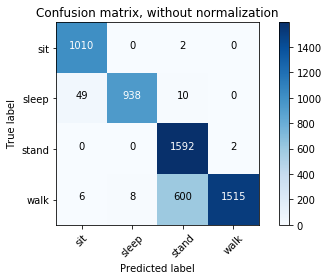

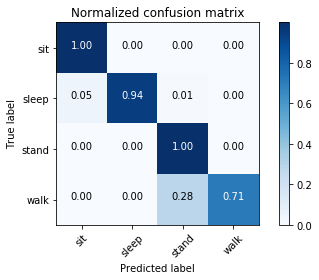

              precision    recall  f1-score   support

         sit       0.95      1.00      0.97      1012
       sleep       0.99      0.94      0.97       997
       stand       0.72      1.00      0.84      1594
        walk       1.00      0.71      0.83      2129

   micro avg       0.88      0.88      0.88      5732
   macro avg       0.92      0.91      0.90      5732
weighted avg       0.91      0.88      0.88      5732

k = 4
Finished training


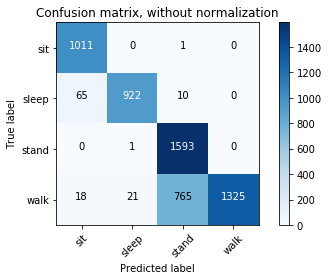

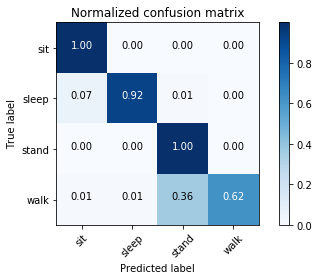

              precision    recall  f1-score   support

         sit       0.92      1.00      0.96      1012
       sleep       0.98      0.92      0.95       997
       stand       0.67      1.00      0.80      1594
        walk       1.00      0.62      0.77      2129

   micro avg       0.85      0.85      0.85      5732
   macro avg       0.89      0.89      0.87      5732
weighted avg       0.89      0.85      0.84      5732

k = 5
Finished training


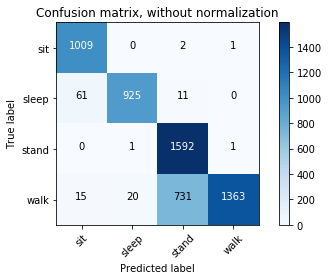

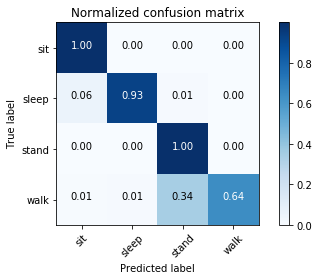

              precision    recall  f1-score   support

         sit       0.93      1.00      0.96      1012
       sleep       0.98      0.93      0.95       997
       stand       0.68      1.00      0.81      1594
        walk       1.00      0.64      0.78      2129

   micro avg       0.85      0.85      0.85      5732
   macro avg       0.90      0.89      0.88      5732
weighted avg       0.89      0.85      0.85      5732

k = 6
Finished training


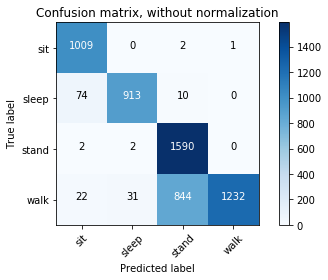

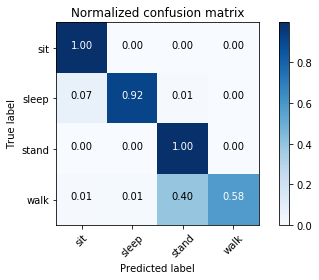

              precision    recall  f1-score   support

         sit       0.91      1.00      0.95      1012
       sleep       0.97      0.92      0.94       997
       stand       0.65      1.00      0.79      1594
        walk       1.00      0.58      0.73      2129

   micro avg       0.83      0.83      0.83      5732
   macro avg       0.88      0.87      0.85      5732
weighted avg       0.88      0.83      0.82      5732

k = 7
Finished training


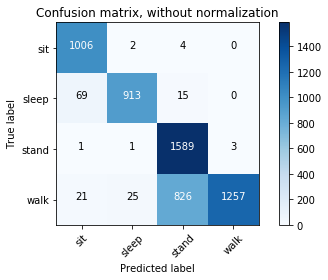

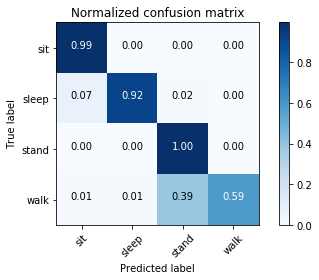

              precision    recall  f1-score   support

         sit       0.92      0.99      0.95      1012
       sleep       0.97      0.92      0.94       997
       stand       0.65      1.00      0.79      1594
        walk       1.00      0.59      0.74      2129

   micro avg       0.83      0.83      0.83      5732
   macro avg       0.88      0.87      0.86      5732
weighted avg       0.88      0.83      0.83      5732

k = 8
Finished training


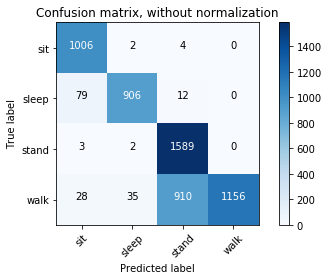

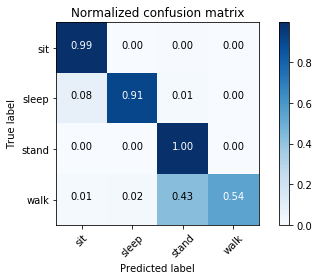

              precision    recall  f1-score   support

         sit       0.90      0.99      0.95      1012
       sleep       0.96      0.91      0.93       997
       stand       0.63      1.00      0.77      1594
        walk       1.00      0.54      0.70      2129

   micro avg       0.81      0.81      0.81      5732
   macro avg       0.87      0.86      0.84      5732
weighted avg       0.87      0.81      0.81      5732

k = 9
Finished training


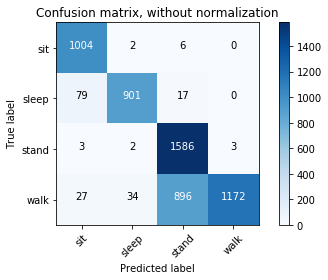

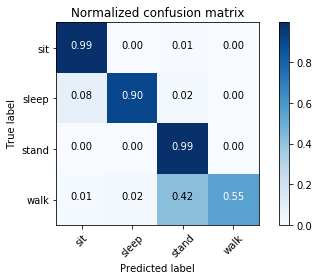

              precision    recall  f1-score   support

         sit       0.90      0.99      0.94      1012
       sleep       0.96      0.90      0.93       997
       stand       0.63      0.99      0.77      1594
        walk       1.00      0.55      0.71      2129

   micro avg       0.81      0.81      0.81      5732
   macro avg       0.87      0.86      0.84      5732
weighted avg       0.87      0.81      0.81      5732

k = 10
Finished training


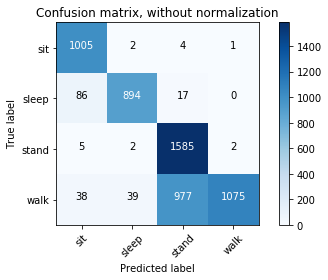

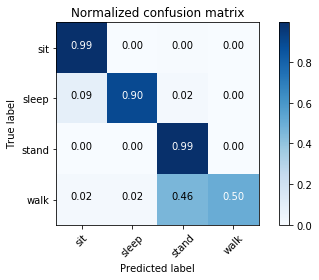

              precision    recall  f1-score   support

         sit       0.89      0.99      0.94      1012
       sleep       0.95      0.90      0.92       997
       stand       0.61      0.99      0.76      1594
        walk       1.00      0.50      0.67      2129

   micro avg       0.80      0.80      0.80      5732
   macro avg       0.86      0.85      0.82      5732
weighted avg       0.86      0.80      0.79      5732

k = 11
Finished training


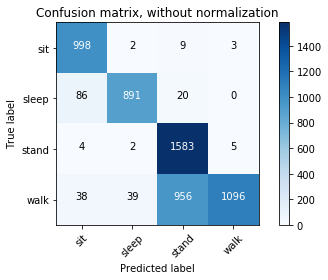

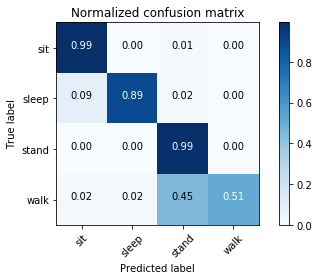

              precision    recall  f1-score   support

         sit       0.89      0.99      0.93      1012
       sleep       0.95      0.89      0.92       997
       stand       0.62      0.99      0.76      1594
        walk       0.99      0.51      0.68      2129

   micro avg       0.80      0.80      0.80      5732
   macro avg       0.86      0.85      0.82      5732
weighted avg       0.86      0.80      0.79      5732

k = 12
Finished training


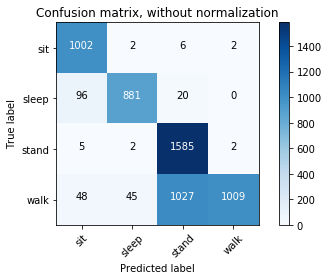

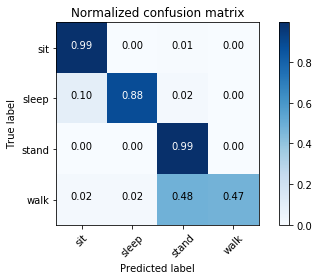

              precision    recall  f1-score   support

         sit       0.87      0.99      0.93      1012
       sleep       0.95      0.88      0.91       997
       stand       0.60      0.99      0.75      1594
        walk       1.00      0.47      0.64      2129

   micro avg       0.78      0.78      0.78      5732
   macro avg       0.85      0.84      0.81      5732
weighted avg       0.86      0.78      0.77      5732

k = 13
Finished training


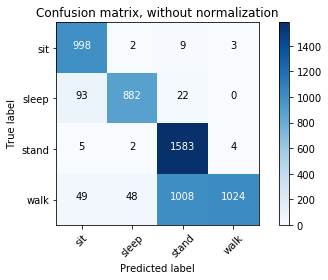

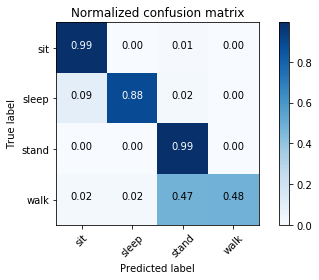

              precision    recall  f1-score   support

         sit       0.87      0.99      0.93      1012
       sleep       0.94      0.88      0.91       997
       stand       0.60      0.99      0.75      1594
        walk       0.99      0.48      0.65      2129

   micro avg       0.78      0.78      0.78      5732
   macro avg       0.85      0.84      0.81      5732
weighted avg       0.85      0.78      0.77      5732

k = 14
Finished training


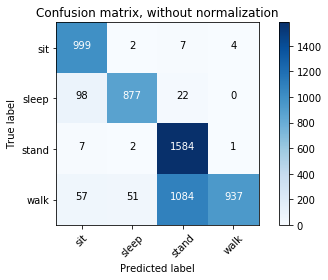

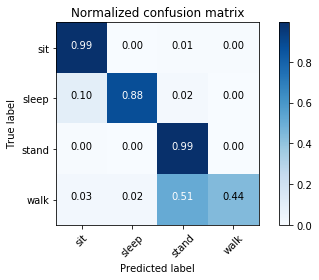

              precision    recall  f1-score   support

         sit       0.86      0.99      0.92      1012
       sleep       0.94      0.88      0.91       997
       stand       0.59      0.99      0.74      1594
        walk       0.99      0.44      0.61      2129

   micro avg       0.77      0.77      0.77      5732
   macro avg       0.85      0.83      0.79      5732
weighted avg       0.85      0.77      0.75      5732



In [34]:
acc_all = []

for i in range(1, 15):
    print('k =', i)
    knn_model = nn_classifier(X_train, y_train, k=i)
    print("Finished training")
    
    y_pred = knn_model.predict(X_test)
    
    show_conf_matrix(y_test, y_pred, LABELS)
    show_clf_report(y_test, y_pred, LABELS)
    
    acc = accuracy_score(y_test, y_pred)
    acc_all.append(acc)

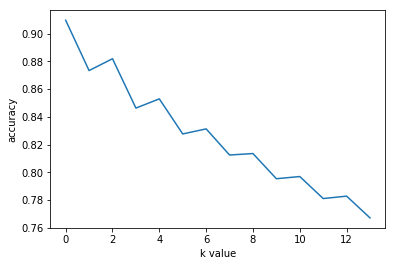

In [36]:
plt.plot(acc_all)
plt.ylabel('accuracy')
plt.xlabel('k value')
plt.show()

# Evaluate with unseen data

In [15]:
%run test_model.ipynb

Loading 1016's data
Finished prediction
iou: [0.29551692589204026, 0.5894160583941606, 0.19901112484548825, 0.12386706948640483]


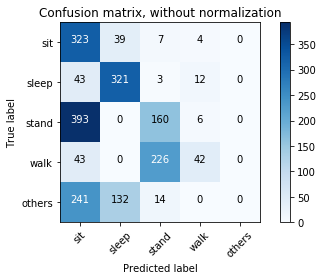

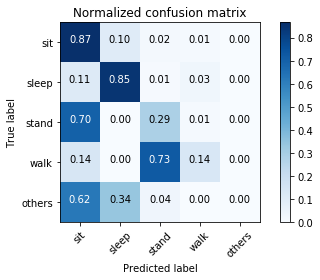

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.31      0.87      0.46       373
       sleep       0.65      0.85      0.74       379
       stand       0.39      0.29      0.33       559
        walk       0.66      0.14      0.22       311
      others       0.00      0.00      0.00       387

   micro avg       0.42      0.42      0.42      2009
   macro avg       0.40      0.43      0.35      2009
weighted avg       0.39      0.42      0.35      2009

['sit', 'sleep', 'stand', 'walk', 'others']


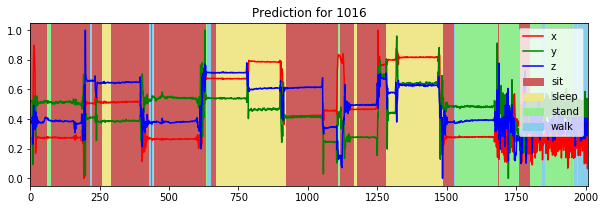

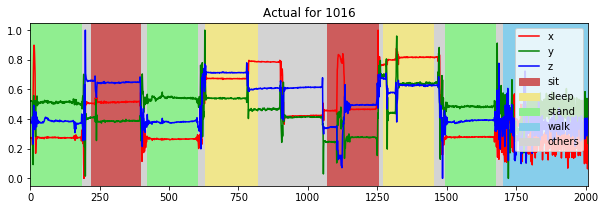

({'sit':        ID               timestamp         x         y         z
  0    1016 2019-05-12 12:19:57.386  0.505634  0.407832  0.659205
  1    1016 2019-05-12 12:19:57.547  0.506466  0.412042  0.660431
  2    1016 2019-05-12 12:19:57.706  0.506133  0.407167  0.659000
  3    1016 2019-05-12 12:19:57.869  0.507630  0.413593  0.657978
  4    1016 2019-05-12 12:19:58.027  0.507131  0.408497  0.661862
  5    1016 2019-05-12 12:19:58.189  0.506300  0.410269  0.657569
  6    1016 2019-05-12 12:19:58.348  0.506965  0.410712  0.658796
  7    1016 2019-05-12 12:19:58.508  0.504803  0.409605  0.658591
  8    1016 2019-05-12 12:19:58.669  0.505967  0.410491  0.662271
  9    1016 2019-05-12 12:19:58.830  0.505302  0.410048  0.659205
  10   1016 2019-05-12 12:19:58.991  0.505634  0.410048  0.659818
  11   1016 2019-05-12 12:19:59.153  0.506632  0.412485  0.655934
  12   1016 2019-05-12 12:19:59.314  0.505302  0.408275  0.660431
  13   1016 2019-05-12 12:19:59.472  0.504969  0.412485  0.660022
  1

In [31]:
call_functions('1016', model, label_list)

Loading 3001's data
Finished prediction
iou: [0.027220630372492838, 0.02119642016015073, 0.005988023952095809, 0.0]


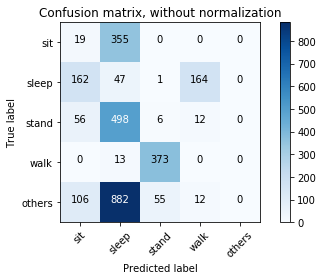

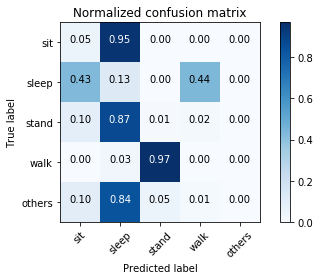

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.06      0.05      0.05       374
       sleep       0.03      0.13      0.04       374
       stand       0.01      0.01      0.01       572
        walk       0.00      0.00      0.00       386
      others       0.00      0.00      0.00      1055

   micro avg       0.03      0.03      0.03      2761
   macro avg       0.02      0.04      0.02      2761
weighted avg       0.01      0.03      0.02      2761

['sit', 'sleep', 'stand', 'walk', 'others']


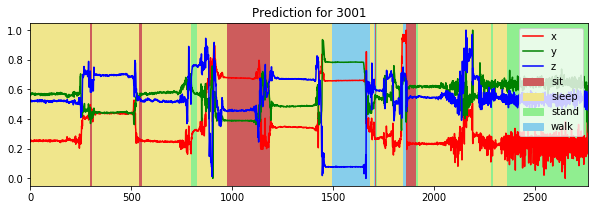

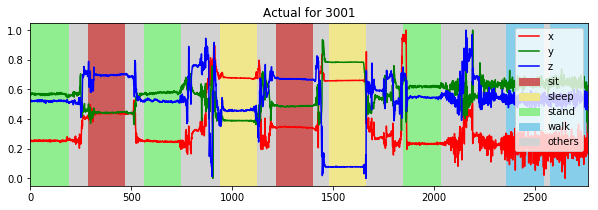

Loading 3002's data
Finished prediction
iou: [0.15996074582924436, 0.01474056603773585, 0.0, 0.0]


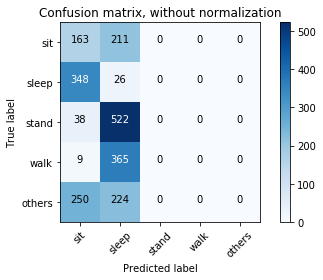

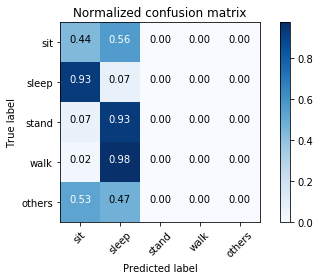

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.20      0.44      0.28       374
       sleep       0.02      0.07      0.03       374
       stand       0.00      0.00      0.00       560
        walk       0.00      0.00      0.00       374
      others       0.00      0.00      0.00       474

   micro avg       0.09      0.09      0.09      2156
   macro avg       0.04      0.10      0.06      2156
weighted avg       0.04      0.09      0.05      2156

['sit', 'sleep', 'stand', 'walk', 'others']


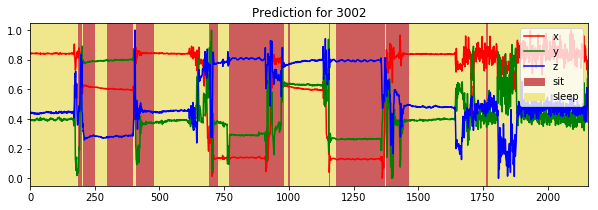

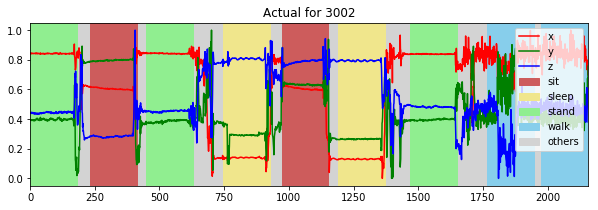

Loading 3003's data
Finished prediction
iou: [0.7017937219730942, 0.34538534728829684, 0.3235294117647059, 0.11068702290076336]


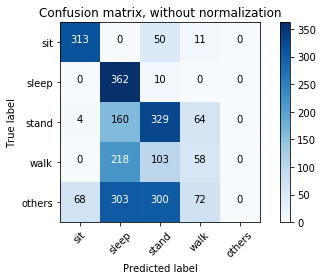

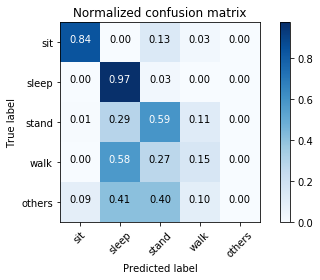

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.81      0.84      0.82       374
       sleep       0.35      0.97      0.51       372
       stand       0.42      0.59      0.49       557
        walk       0.28      0.15      0.20       379
      others       0.00      0.00      0.00       743

   micro avg       0.44      0.44      0.44      2425
   macro avg       0.37      0.51      0.40      2425
weighted avg       0.32      0.44      0.35      2425

['sit', 'sleep', 'stand', 'walk', 'others']


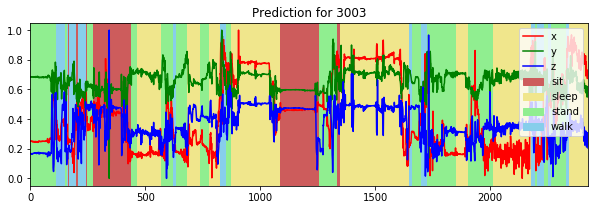

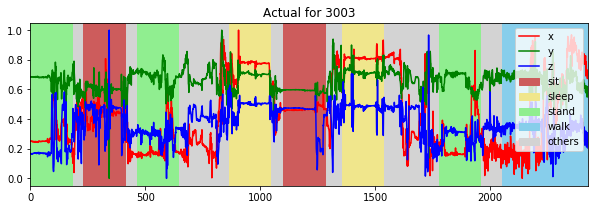

Loading 3004's data
Finished prediction
iou: [0.44176136363636365, 0.18315575849822424, 0.0, 0.0]


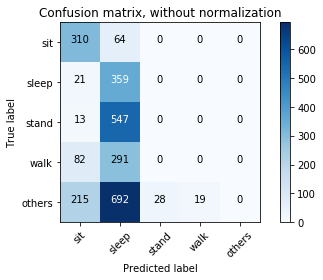

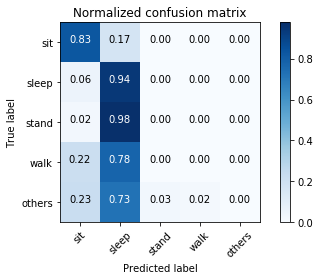

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.48      0.83      0.61       374
       sleep       0.18      0.94      0.31       380
       stand       0.00      0.00      0.00       560
        walk       0.00      0.00      0.00       373
      others       0.00      0.00      0.00       954

   micro avg       0.25      0.25      0.25      2641
   macro avg       0.13      0.35      0.18      2641
weighted avg       0.09      0.25      0.13      2641

['sit', 'sleep', 'stand', 'walk', 'others']


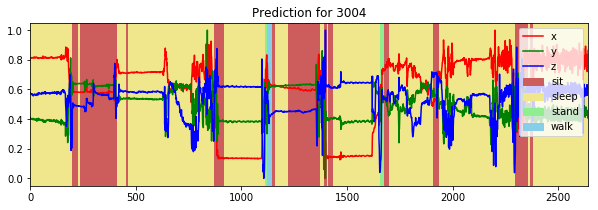

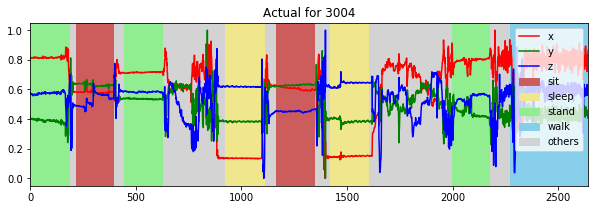

Loading 3005's data
Finished prediction
iou: [0.011811023622047244, 0.0, 0.0, 0.0]


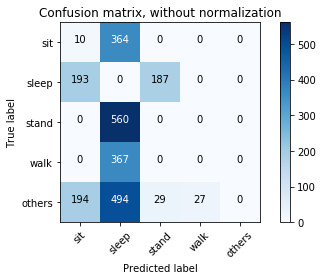

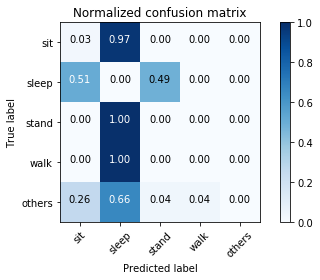

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.03      0.03      0.03       374
       sleep       0.00      0.00      0.00       380
       stand       0.00      0.00      0.00       560
        walk       0.00      0.00      0.00       367
      others       0.00      0.00      0.00       744

   micro avg       0.00      0.00      0.00      2425
   macro avg       0.01      0.01      0.01      2425
weighted avg       0.00      0.00      0.00      2425

['sit', 'sleep', 'stand', 'walk', 'others']


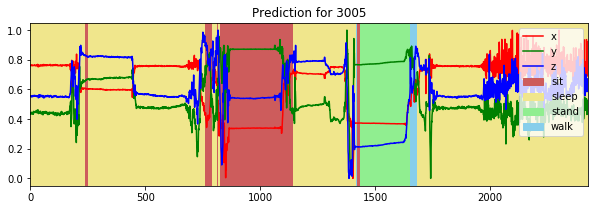

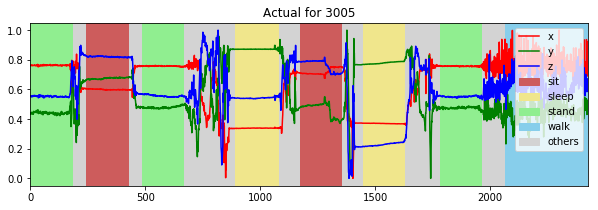

In [24]:
all_patients = [str(i) for i in range(3001,3006)]

for subject_id in all_patients:
    call_functions(subject_id, model, label_list)

# Do not use cells below

Loading 1001's data
Finished prediction
iou: [0.4389261744966443, 0.46795827123695977, 0.2664624808575804, 0.4990512333965844]


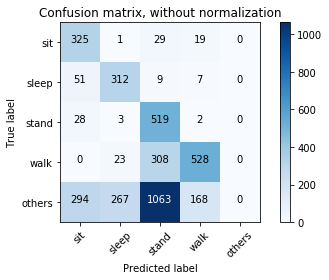

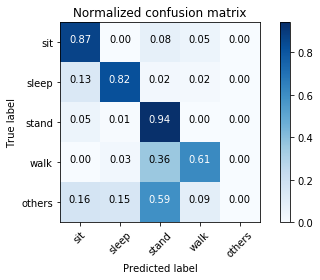

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.47      0.87      0.61       374
       sleep       0.51      0.82      0.63       379
       stand       0.27      0.94      0.42       552
        walk       0.73      0.61      0.67       859
      others       0.00      0.00      0.00      1792

   micro avg       0.43      0.43      0.43      3956
   macro avg       0.40      0.65      0.47      3956
weighted avg       0.29      0.43      0.32      3956

['sit', 'sleep', 'stand', 'walk', 'others']


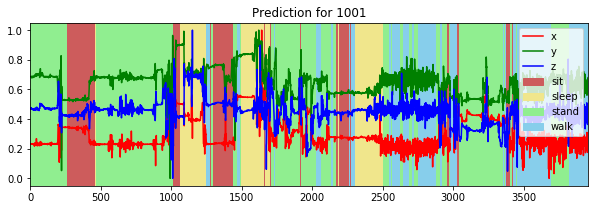

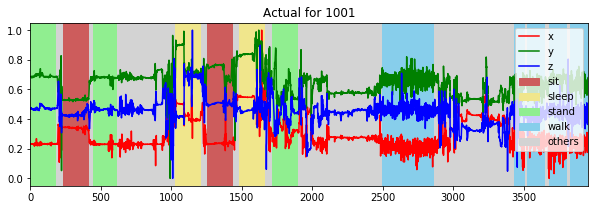

Loading 1002's data
Finished prediction
iou: [0.46855345911949686, 0.5944055944055944, 0.4213694507148232, 0.5786802030456852]


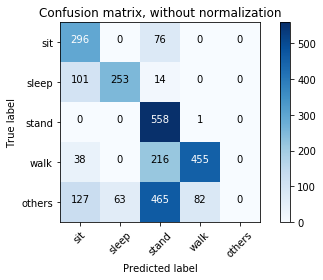

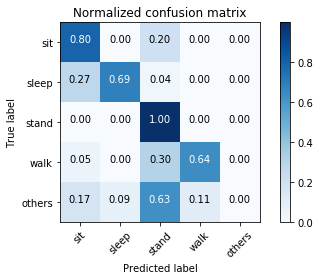

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.53      0.80      0.63       372
       sleep       0.80      0.69      0.74       368
       stand       0.42      1.00      0.59       559
        walk       0.85      0.64      0.73       709
      others       0.00      0.00      0.00       737

   micro avg       0.57      0.57      0.57      2745
   macro avg       0.52      0.62      0.54      2745
weighted avg       0.48      0.57      0.49      2745

['sit', 'sleep', 'stand', 'walk', 'others']


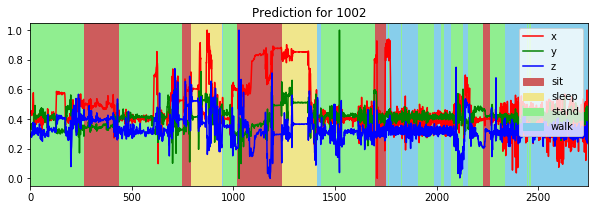

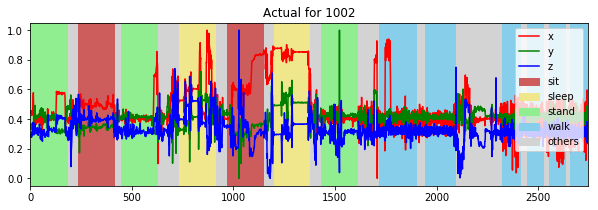

Loading 1003's data
Finished prediction
iou: [0.5583333333333333, 0.39948453608247425, 0.35600762873490144, 0.6153846153846154]


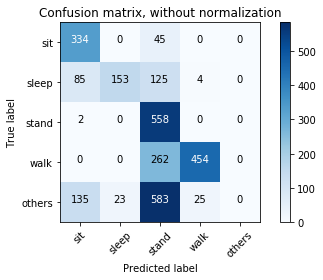

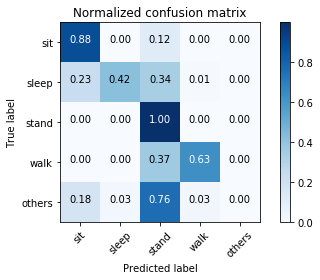

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.60      0.88      0.71       379
       sleep       0.87      0.42      0.56       367
       stand       0.35      1.00      0.52       560
        walk       0.94      0.63      0.76       716
      others       0.00      0.00      0.00       766

   micro avg       0.54      0.54      0.54      2788
   macro avg       0.55      0.59      0.51      2788
weighted avg       0.51      0.54      0.47      2788

['sit', 'sleep', 'stand', 'walk', 'others']


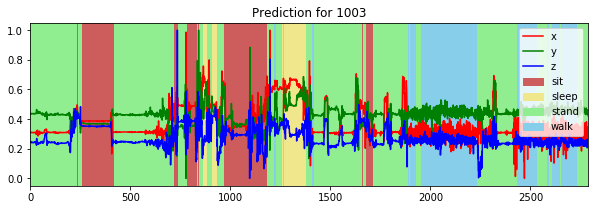

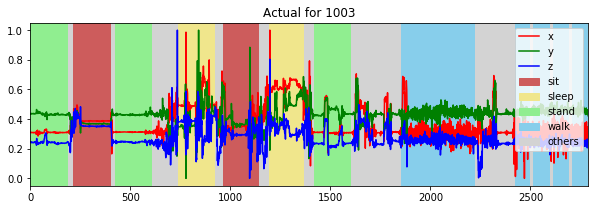

Loading 1004's data
Finished prediction
iou: [0.46320346320346323, 0.5953177257525084, 0.5434083601286174, 0.5990159901599016]


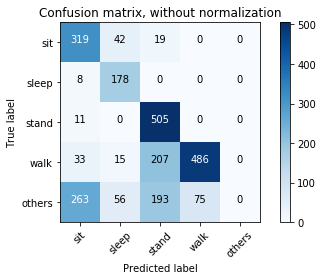

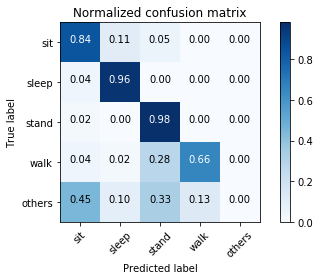

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.50      0.84      0.63       380
       sleep       0.61      0.96      0.75       186
       stand       0.55      0.98      0.70       516
        walk       0.87      0.66      0.75       741
      others       0.00      0.00      0.00       587

   micro avg       0.62      0.62      0.62      2410
   macro avg       0.51      0.69      0.56      2410
weighted avg       0.51      0.62      0.54      2410

['sit', 'sleep', 'stand', 'walk', 'others']


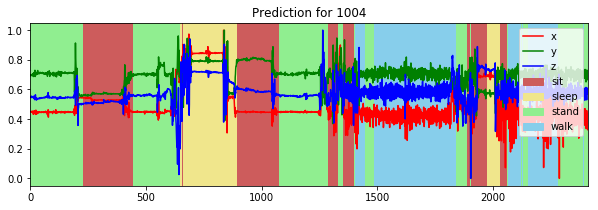

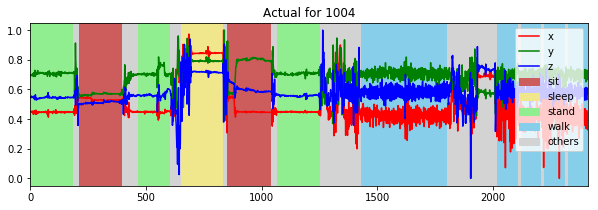

Loading 1005's data
Finished prediction
iou: [0.6972111553784861, 0.8574660633484162, 0.40795287187039764, 0.6114130434782609]


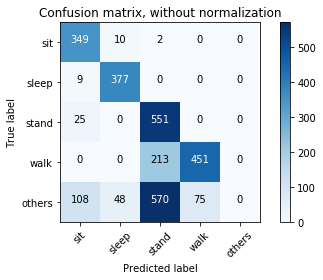

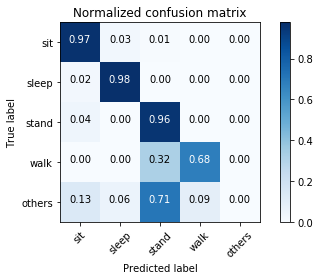

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.71      0.97      0.82       361
       sleep       0.87      0.98      0.92       386
       stand       0.41      0.96      0.58       576
        walk       0.86      0.68      0.76       664
      others       0.00      0.00      0.00       801

   micro avg       0.62      0.62      0.62      2788
   macro avg       0.57      0.72      0.61      2788
weighted avg       0.50      0.62      0.53      2788

['sit', 'sleep', 'stand', 'walk', 'others']


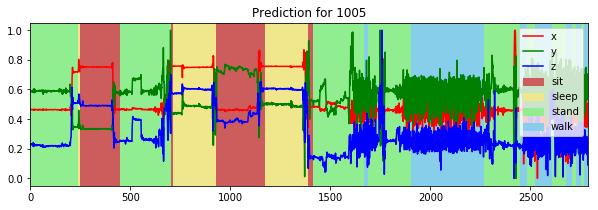

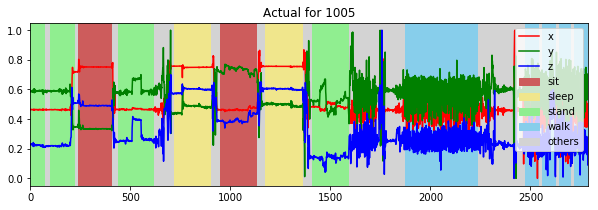

Loading 1006's data
Finished prediction
iou: [0.676829268292683, 0.777262180974478, 0.5004460303300624, 0.7317073170731707]


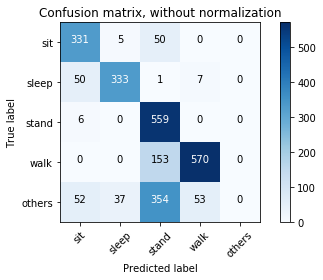

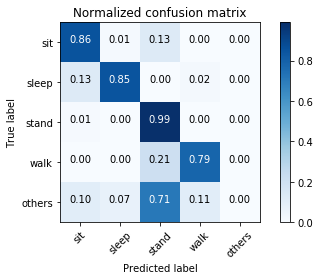

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.75      0.86      0.80       386
       sleep       0.89      0.85      0.87       391
       stand       0.50      0.99      0.66       565
        walk       0.90      0.79      0.84       723
      others       0.00      0.00      0.00       496

   micro avg       0.70      0.70      0.70      2561
   macro avg       0.61      0.70      0.64      2561
weighted avg       0.62      0.70      0.64      2561

['sit', 'sleep', 'stand', 'walk', 'others']


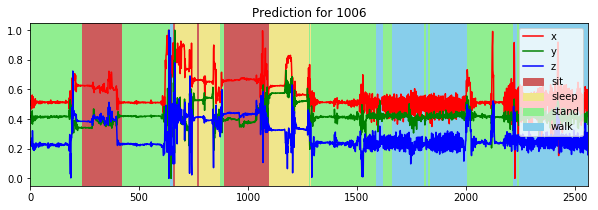

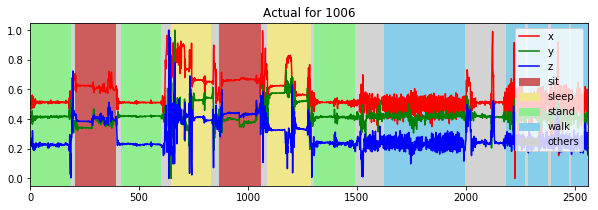

Loading 1007's data
Finished prediction
iou: [0.45714285714285713, 0.6256281407035176, 0.41809672386895474, 0.5706371191135734]


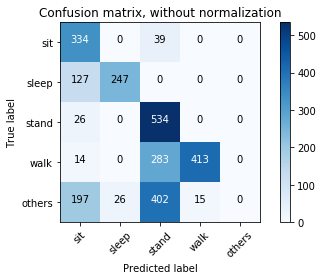

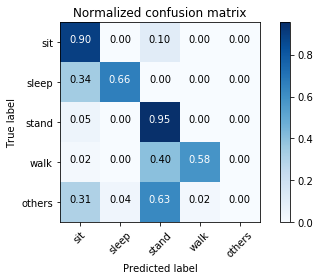

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.48      0.90      0.62       373
       sleep       0.90      0.66      0.76       374
       stand       0.42      0.95      0.59       560
        walk       0.96      0.58      0.73       710
      others       0.00      0.00      0.00       640

   micro avg       0.58      0.58      0.58      2657
   macro avg       0.55      0.62      0.54      2657
weighted avg       0.54      0.58      0.51      2657

['sit', 'sleep', 'stand', 'walk', 'others']


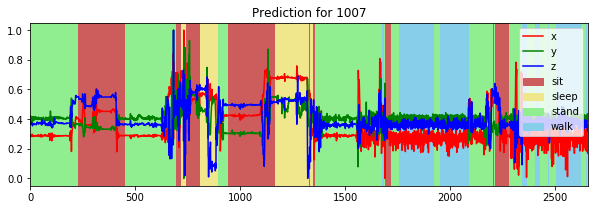

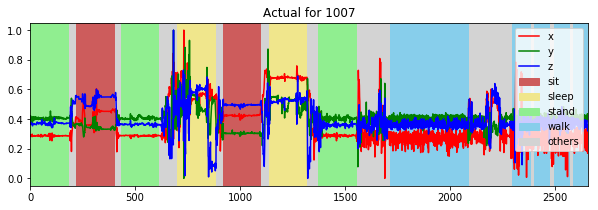

Loading 1008's data
Finished prediction
iou: [0.5567190226876091, 0.4197901049475262, 0.3548387096774194, 0.4683053040103493]


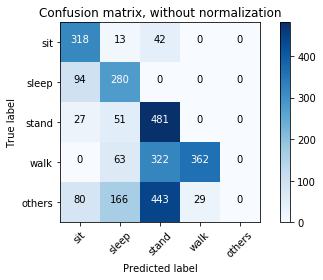

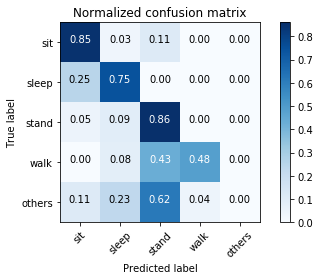

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.61      0.85      0.71       373
       sleep       0.49      0.75      0.59       374
       stand       0.37      0.86      0.52       559
        walk       0.93      0.48      0.64       747
      others       0.00      0.00      0.00       718

   micro avg       0.52      0.52      0.52      2771
   macro avg       0.48      0.59      0.49      2771
weighted avg       0.47      0.52      0.45      2771

['sit', 'sleep', 'stand', 'walk', 'others']


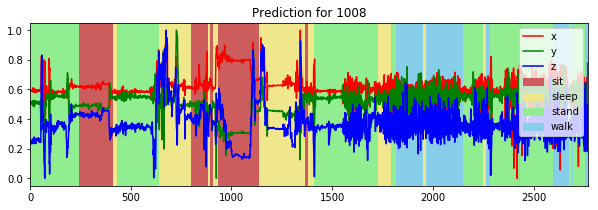

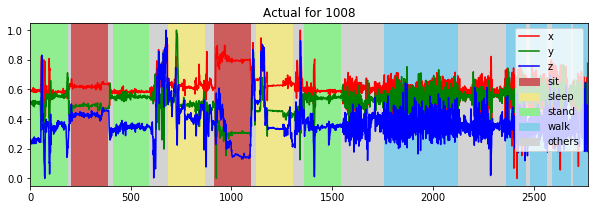

Loading 1009's data
Finished prediction
iou: [0.5409582689335394, 0.6158088235294118, 0.2192676547515257, 0.30662393162393164]


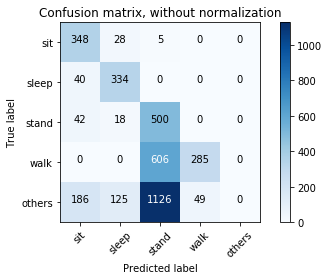

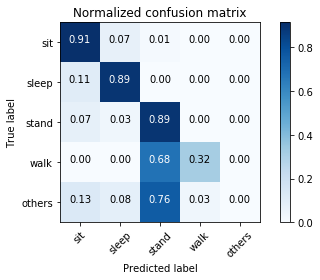

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.56      0.91      0.70       381
       sleep       0.66      0.89      0.76       374
       stand       0.22      0.89      0.36       560
        walk       0.85      0.32      0.47       891
      others       0.00      0.00      0.00      1486

   micro avg       0.40      0.40      0.40      3692
   macro avg       0.46      0.60      0.46      3692
weighted avg       0.37      0.40      0.32      3692

['sit', 'sleep', 'stand', 'walk', 'others']


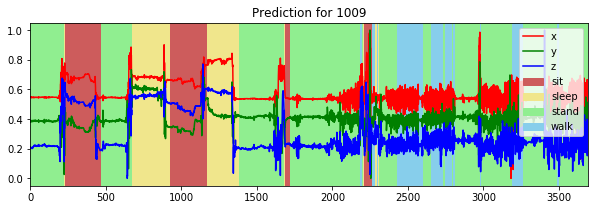

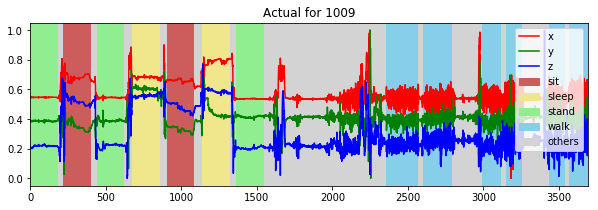

Loading 1010's data
Finished prediction
iou: [0.6252220248667851, 0.47067238912732473, 0.3918269230769231, 0.4927916120576671]


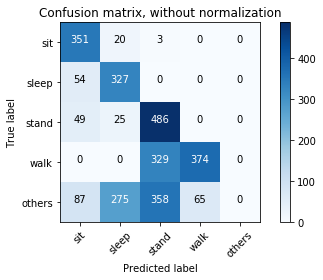

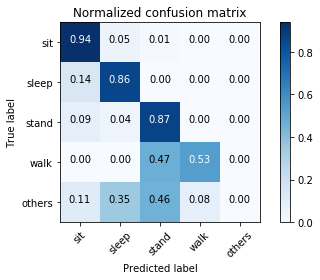

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.65      0.94      0.77       374
       sleep       0.51      0.86      0.64       381
       stand       0.41      0.87      0.56       560
        walk       0.85      0.53      0.65       703
      others       0.00      0.00      0.00       785

   micro avg       0.55      0.55      0.55      2803
   macro avg       0.48      0.64      0.52      2803
weighted avg       0.45      0.55      0.46      2803

['sit', 'sleep', 'stand', 'walk', 'others']


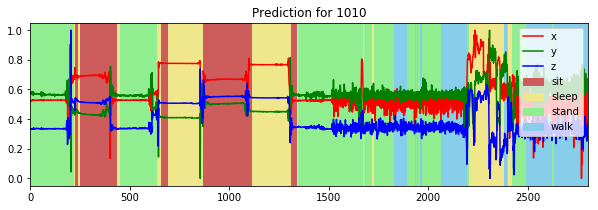

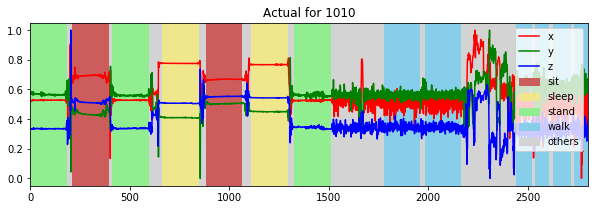

Loading 1011's data
Finished prediction
iou: [0.4583333333333333, 0.6419294990723562, 0.2891844997108155, 0.2954314720812183]


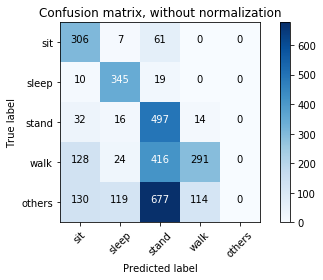

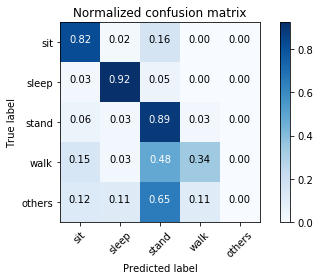

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.50      0.82      0.62       374
       sleep       0.68      0.92      0.78       374
       stand       0.30      0.89      0.45       559
        walk       0.69      0.34      0.46       859
      others       0.00      0.00      0.00      1040

   micro avg       0.45      0.45      0.45      3206
   macro avg       0.43      0.59      0.46      3206
weighted avg       0.38      0.45      0.36      3206

['sit', 'sleep', 'stand', 'walk', 'others']


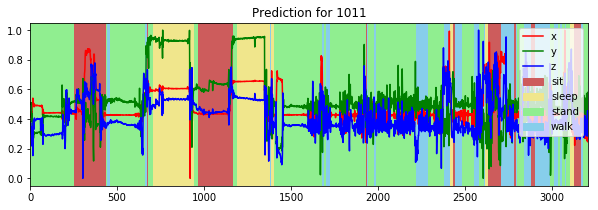

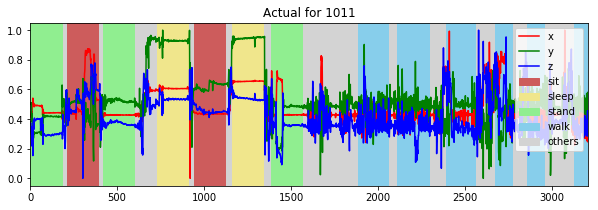

Loading 1012's data
Finished prediction
iou: [0.7248459958932238, 0.7702127659574468, 0.43172849250197315, 0.4123287671232877]


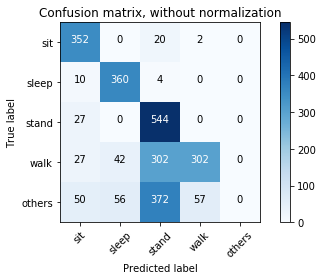

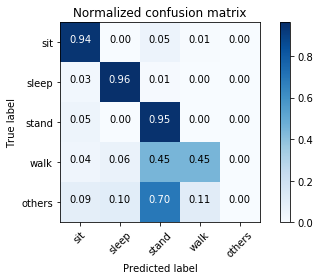

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.76      0.94      0.84       374
       sleep       0.79      0.96      0.87       374
       stand       0.44      0.95      0.60       571
        walk       0.84      0.45      0.58       673
      others       0.00      0.00      0.00       535

   micro avg       0.62      0.62      0.62      2527
   macro avg       0.56      0.66      0.58      2527
weighted avg       0.55      0.62      0.54      2527

['sit', 'sleep', 'stand', 'walk', 'others']


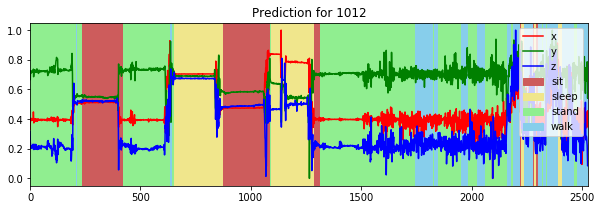

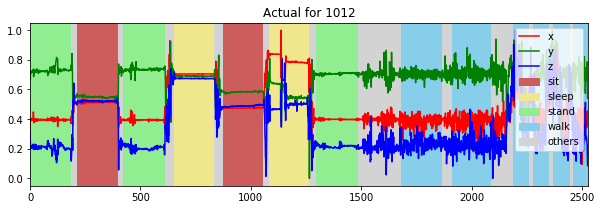

Loading 1013's data
Finished prediction
iou: [0.5271453590192644, 0.6365591397849463, 0.45541125541125543, 0.5590277777777778]


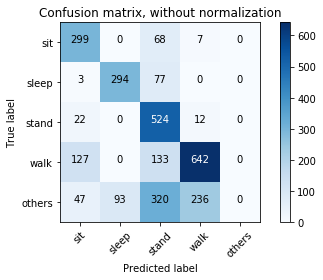

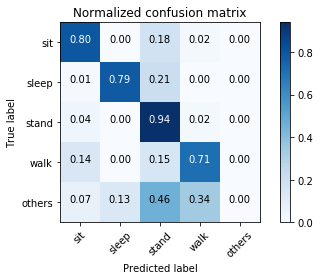

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.60      0.80      0.69       374
       sleep       0.76      0.79      0.77       374
       stand       0.47      0.94      0.62       558
        walk       0.72      0.71      0.71       902
      others       0.00      0.00      0.00       696

   micro avg       0.61      0.61      0.61      2904
   macro avg       0.51      0.65      0.56      2904
weighted avg       0.49      0.61      0.53      2904

['sit', 'sleep', 'stand', 'walk', 'others']


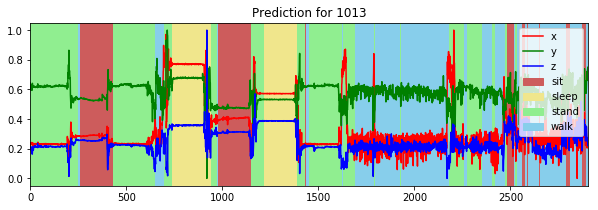

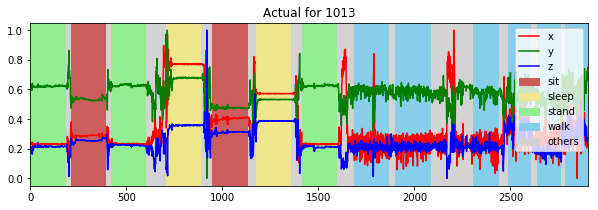

Loading 1014's data
Finished prediction
iou: [0.6950207468879668, 0.5136363636363637, 0.4090554254488681, 0.2917082917082917]


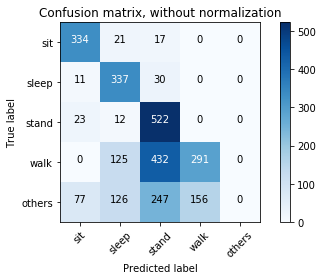

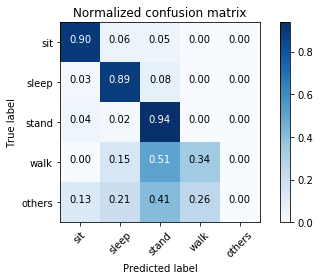

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.75      0.90      0.82       372
       sleep       0.54      0.89      0.67       378
       stand       0.42      0.94      0.58       557
        walk       0.65      0.34      0.45       848
      others       0.00      0.00      0.00       606

   micro avg       0.54      0.54      0.54      2761
   macro avg       0.47      0.61      0.50      2761
weighted avg       0.46      0.54      0.46      2761

['sit', 'sleep', 'stand', 'walk', 'others']


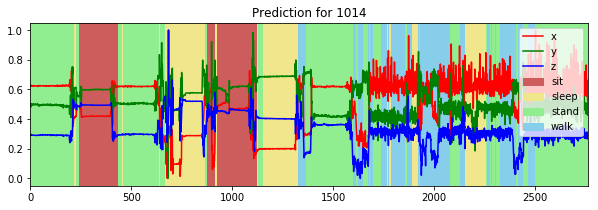

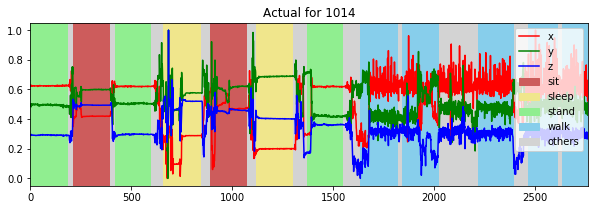

In [16]:
filename = '../../model/knn_model.pkl'
model = pickle.load(open(filename,'rb'))
label_list = ['sit', 'sleep', 'stand', 'walk']

for subject_id in all_subjects:
    call_functions(subject_id, model, label_list)

# Walk Algorithm

In [ ]:
walk_exact = []
walk_label = 3
window_length = 60

for i in range(window_length, len(y_all)):
    if(y_all[i]==walk_label):
        walk_exact.append(walk_label)
    else:
        walk_exact.append(0)

## Walk Algorithm Evaluation

In [ ]:
%run preprocessing.ipynb

In [ ]:
X_pure, y_pure = prepare_pure_label(X_all, y_all, subj_all, all_subjects, new_label_list)
X_impure, y_impure = prepare_impure_label(X_all, y_all)

In [ ]:
print(np.array(X_impure).shape, np.array(y_impure).shape)
print(np.array(X_all).shape)

In [ ]:
X_test_inv = inverse_segmentation(X_test)

In [ ]:
def get_df_walk(X):
    df_walk = pd.DataFrame({
        'x': [a[0] for a in X],
        'y': [a[1] for a in X],
        'z': [a[2] for a in X]
    })
    
    return df_walk

In [61]:
df_walk = get_df_walk(X_all)

In [69]:
%run classifier_algo.ipynb

In [ ]:
classify_walk_2(df_walk, 4)
# print(walk_pred)

In [40]:
print(X_test_inv.shape)

(5760, 3)


0.6281749602048584


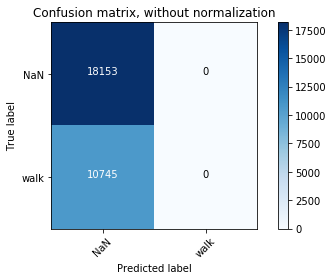

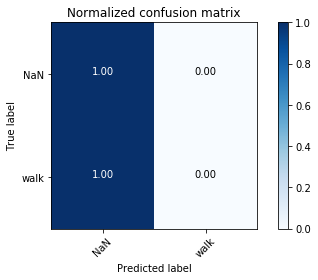

              precision    recall  f1-score   support

         NaN       0.63      1.00      0.77     18153
        walk       0.00      0.00      0.00     10745

   micro avg       0.63      0.63      0.63     28898
   macro avg       0.31      0.50      0.39     28898
weighted avg       0.39      0.63      0.48     28898



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
walk_true = []

walk_label = 3
nonwalk_label = 0

for i, y_i in enumerate(y_all):
    if(y_i==walk_label):
        walk_true.append(y_i)
    else:
        walk_true.append(nonwalk_label)

acc = accuracy_score(walk_true, walk_pred)
print(acc)

walk_lbl = ['NaN', 'walk']

show_conf_matrix(walk_true, walk_pred, walk_lbl)
show_clf_report(walk_true, walk_pred, walk_lbl)

# Combine KNN and Walk Algorithm
#### Before Post Process

In [33]:
%run preprocessing.ipynb

In [34]:
X_test_i = inverse_segmentation(X_test, y_pred.shape[0])

(85, 60, 3)
(19, 3)
86


In [35]:
print(X_test_i.shape, y_pred.shape)

(5119, 3) (5119,)


In [36]:
y_pred_svm = knn_model.predict(X_impure)
print("Finished predicting")

Finished predicting


In [37]:
y_pred_new = combine_2(X_pca, y_all, exceed_threshold=2)

In [38]:
y_pred_new = np.array(y_pred_new)

In [39]:
y_pred_fill = np.hstack(([y_pred_svm[0] for i in range(window_length-1)], y_pred_svm))

0.549207557616444


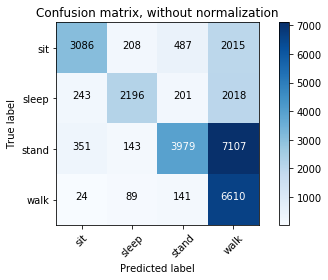

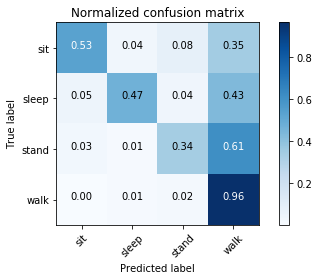

              precision    recall  f1-score   support

         sit       0.83      0.53      0.65      5796
       sleep       0.83      0.47      0.60      4658
       stand       0.83      0.34      0.49     11580
        walk       0.37      0.96      0.54      6864

   micro avg       0.55      0.55      0.55     28898
   macro avg       0.72      0.58      0.57     28898
weighted avg       0.72      0.55      0.55     28898



In [40]:
acc = accuracy_score(y_pred_fill, y_pred_new)
print(acc)

show_conf_matrix(y_pred_fill, y_pred_new, LABELS)
show_clf_report(y_pred_fill, y_pred_new, LABELS)

# Test Model with Some Subjects

In [32]:
filename = '../../model/knn_model.pkl'

model = pickle.load(open(filename,'rb'))

In [33]:
label_list = ['sit', 'sleep', 'stand', 'walk']

In [37]:
%run test_model.ipynb

#### After Post-process

In [39]:
unseen_patients = [str(i) for i in range(3001,3006)]

for subject_id in unseen_patients:
    df_acc_label, true_periods, pred_periods, iou = call_functions(subject_id, model, label_list)

Loading 3001's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.0, 0.013942307692307693, 0.01818181818181818, 0.0]
Loading 3002's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.21981424148606812, 0.006053268765133172, 0.0, 0.0]
Loading 3003's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.5333333333333333, 0.3314500941619586, 0.291, 0.12473118279569892]
Loading 3004's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.4562410329985653, 0.16803699897225077, 0.0, 0.0]
Loading 3005's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.002600780234070221, 0.00621414913957935, 0.0, 0.0]


In [40]:
unseen_patients = [str(i) for i in range(3001,3006)]

for subject_id in unseen_patients:
    df_acc_label, true_periods, pred_periods, iou = call_functions(subject_id, pca, model, label_list)

Loading 3001's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.0, 0.01750121536217793, 0.017769002961500493, 0.0]
Loading 3002's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.1873661670235546, 0.005319148936170213, 0.0, 0.0]
Loading 3003's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.5127701375245579, 0.3342830009496676, 0.25732217573221755, 0.13966480446927373]
Loading 3004's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.43411927877947293, 0.17855310415597742, 0.0, 0.0]
Loading 3005's data
Finished prediction
label: ['sit', 'sleep', 'stand', 'walk']
iou: [0.0, 0.007600950118764846, 0.0, 0.0]


# End of today's progress

In [ ]:
all_subjects = [str(i) for i in range(3001,3006)]

call_functions(all_subjects,pca)

In [ ]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca)
df_y = predict(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pp_periods, actual_periods)

In [ ]:
print(df_y.shape, df_test.shape)

# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
print(s)
print(df_y)

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive AC (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()